# Telecom Churn Prediction

Let's study the customer's behaviour to analyse their churn rate. 
We can discover trends and pattern to help the telco company to decrease churn rate which could hurt the company business. <br>

dataset used is secondary dataset *'WA_Fn-UseC_-Telco-Customer-Churn.csv'* from Kaggle, which contains customer information from a fictional telco company. 

**Business goal**:
1. Acquire new customer
2. Retain existing customer 

**Problems**:
- company need to invest cost & time to get new customer
- lost of investment when customer unsubcribe from the services
- need to find new customer to replace the churned customer but it is more expensive and difficult 

**Objectives** (to retain customer as much as possible):
- predict whether the customer will continue the service
- understand the customer behavior:
    -what make them stay
    -what make them leave 

## 1. Part 1: Data Cleansing and EDA

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

pd.set_option('display.precision', 2)

## 1.1 Data Audit

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 1.2 Data Cleaning

### 1.2.1 Deduplication

In [5]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Values such as *No phone service* and *No internet service* depends on if the customer subscribe to phone service and internet service respectively. To reduce dataset dimension, we can replace these values to *No*

In [6]:
df.replace({'No phone service': 'No',
            'No internet service': 'No'},
            inplace = True)

### 1.2.2 Drop irrelevant data

In [7]:
df.drop('customerID', axis = 1, inplace = True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 1.2.3 Fix structural errors

In [8]:
#convert TotalCharges from object to numeric data 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [9]:
d = {'Yes': 1, 'No': 0}
df['Churn'] = df['Churn'].map(d)

In [10]:
d = {0: 'No', 1: 'Yes'}
df['SeniorCitizen'] = df['SeniorCitizen'].map(d)

In [11]:
df.rename(columns = {'gender': 'Gender', 'tenure': 'Tenure'}, inplace = True)

### 1.2.4 Missing Data

In [12]:
df.isnull().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
null_data = df[df.isnull().any(axis=1)]
null_data # all tenure = 0 

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,Male,No,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,0
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,0
1340,Female,No,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,0
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,0
4380,Female,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,0
5218,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,0
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [14]:
df.loc[488, 'TotalCharges']
#these rows with all tenure = 0 actually have blank space in TotalCharges instead of null
#that's why we could'nt use astype to change TotalCharges data type

nan

These rows all share a same characteristic, which is tenure is 0, meaning they haven't start using their service yet, so we can set the blank value to 0

In [15]:
df['TotalCharges'].fillna(0, inplace = True)
df.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### 1.2.5 Data Variation

categorize numerical and categorical attribute 

In [103]:
column_list = list(df.columns)

#numerical attributes
column_numerical = ['Tenure', 'MonthlyCharges', 'TotalCharges']

#categorical attributes
column_categorical = list(df.columns)

for x in column_numerical:
    column_categorical.remove(str(x))
    
data_type_general = dict()

for x in column_list:
    if x in column_numerical:
        data_type_general[x] = 'numerical'
    else:
        data_type_general[x] = 'categorical'

#### 1.2.5.1 Numerical data

In [18]:
variation_numerical = dict()

for x in column_numerical:
    variation = f'{df[x].min()} - {df[x].max()}'
    variation_numerical[x] = variation
    
temp =  pd.Series(variation_numerical)
variation_numerical = pd.DataFrame(temp).T.rename({0: 'data variation'})

variation_numerical

,Tenure,MonthlyCharges,TotalCharges
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8


#### 1.2.5.2 Categorical data

In [19]:
variation = df['SeniorCitizen'].unique().tolist()
variation

['No', 'Yes']

In [20]:
variation_categorical = dict()

for x in column_categorical:
    variation = df[x].unique().tolist()
    variation.sort()
    variation_categorical[x] = ', '.join(str(item) for item in variation)
    
temp =  pd.Series(variation_categorical)
variation_categorical = pd.DataFrame(temp).T.rename({0: 'data variation'})

variation_categorical

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
data variation,"Female, Male","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...","0, 1"


#### 1.2.5.3 Overall data variation

In [21]:
data_variation = pd.concat([variation_numerical, variation_categorical], axis = 1)
data_variation

,Tenure,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8,"Female, Male","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...","0, 1"


In [22]:
pd.concat([variation_numerical.rename({'data variation': 'range'}), 
           variation_categorical.rename({'data variation': 'variation'})],
          axis = 0).fillna('-').reindex(df.columns, axis = 1).T

,range,variation
Gender,-,"Female, Male"
SeniorCitizen,-,"No, Yes"
Partner,-,"No, Yes"
Dependents,-,"No, Yes"
Tenure,0 - 72,-
PhoneService,-,"No, Yes"
MultipleLines,-,"No, Yes"
InternetService,-,"DSL, Fiber optic, No"
OnlineSecurity,-,"No, Yes"
OnlineBackup,-,"No, Yes"


### 1.2.6 Summary of data

#### 1.2.6.1 Summary of general data type

In [23]:
temp = pd.Series(data_type_general)

data_type_general = pd.DataFrame(temp).T.rename({0 : 'general data type'})
data_type_general

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
general data type,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical


#### 1.2.6.2 Summary of python data type

In [24]:
data_type_python = pd.DataFrame(df.dtypes).T.rename({0 : 'python data type'})
data_type_python

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
python data type,object,object,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,int64


#### 1.2.6.3 Summary of total data 

In [25]:
total_data = pd.DataFrame(df.count()).T.rename({0: 'total data'})
total_data

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043


#### 1.2.6.4 Summary of null value

In [26]:
null_value = pd.DataFrame(df.isnull().sum()).T.rename({0: 'null value'})
null_value

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
null value,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 1.2.6.5 Summary of null value percentage

In [27]:
null_value_percent = pd.DataFrame(100* (df.isnull().sum()/df.shape[0]) ).T.rename({0: 'null value percentage'})
null_value_percent

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
null value percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.2.6.6 Summary of dataset info

In [28]:
df_summary = pd.concat([data_type_general, data_type_python, total_data, null_value, null_value_percent, data_variation], axis = 0)
df_summary

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
general data type,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical
python data type,object,object,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,int64
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
null value,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null value percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data variation,"Female, Male","No, Yes","No, Yes","No, Yes",0 - 72,"No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...",18.25 - 118.75,0.0 - 8684.8,"0, 1"


### 1.2.7 Export Data

In [29]:
df.to_csv('cleaned_churn.csv', encoding ='utf-8')

## 1.3 Exploratory data analysis

### 1.3.1 Data Exploration

##### Gender distribution

Gender is equally distributed

In [30]:
def pie(data, graph_title):
    pie_data = df[data].value_counts(normalize = True).sort_values(ascending = True)

    fig, ax = plt.subplots(figsize = (8,6))

    wedges, texts, autotexts = ax.pie(pie_data,
                                      labels = pie_data.index,
                                      startangle = 90, 
                                      explode = [0, 0.1],
                                      autopct='%.0f%%', 
                                      textprops={'weight': 'bold', 'color': 'w', 'fontsize': 14},
                                      colors = ['blue', 'green'])

    #set the color of wedge label text
    for i, wedge in enumerate(wedges):
      texts[i].set_color(wedge.get_facecolor())

    plt.title(graph_title, fontsize = 15)

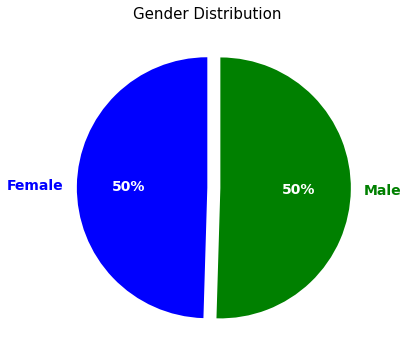

In [31]:
pie('Gender', 'Gender Distribution')

##### Senior Citizen Distribution

Only 16% of customers are senior citizen

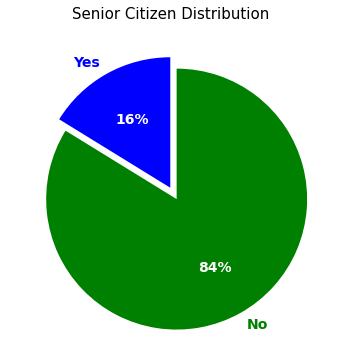

In [32]:
pie('SeniorCitizen', 'Senior Citizen Distribution')

##### Partner & Dependents Distribution

In [33]:
def bar_graph(data, x_label, title):
    ax = data.plot(kind = 'bar')
    plt.xlabel(x_label)
    plt.xticks(rotation = 0)
    plt.title(title)
    for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate('{:.0f}%'.format(height), 
                        (p.get_x()+.2*width, p.get_y()+.4*height),
                        color = 'w',
                        weight = 'bold',size =14)

In [34]:
partner = df['Partner'].value_counts(normalize = True).sort_values(ascending = True).round(4)*100
dependent = df['Dependents'].value_counts(normalize = True).sort_values(ascending = True).round(4)*100

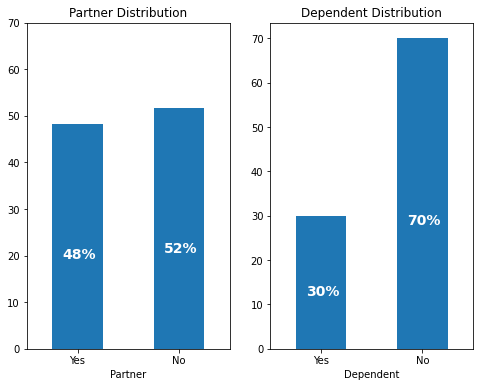

In [35]:
plt.subplots(1, 2, figsize = (8, 6))
plt.subplot(1,2,1)
bar_graph(partner, 'Partner', 'Partner Distribution')
plt.ylim(0,70)

plt.subplot(1,2,2)
bar_graph(dependent, 'Dependent', 'Dependent Distribution')

##### Tenure

Text(0.5, 1.0, 'Number of Customers by Tenure')

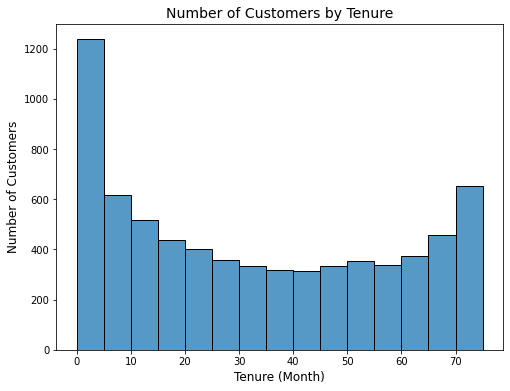

In [36]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.histplot(df['Tenure'], bins = 60, binwidth = 5)
ax.set_xlabel('Tenure (Month)', fontsize =12)
ax.set_ylabel('Number of Customers', fontsize =12)
ax.set_title('Number of Customers by Tenure', fontsize = 14)

##### Contract

Text(0.5, 1.0, 'Number of Customer by Contract Type')

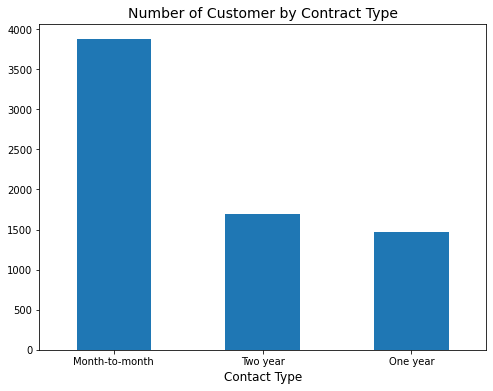

In [37]:
contract_type = df['Contract'].value_counts()

fig, ax = plt.subplots(figsize = (8,6))
ax = contract_type.plot(kind = 'bar')
plt.xlabel('Contact Type', fontsize = 12)
plt.xticks(rotation = 0)
plt.title('Number of Customer by Contract Type', fontsize = 14)

#### Services

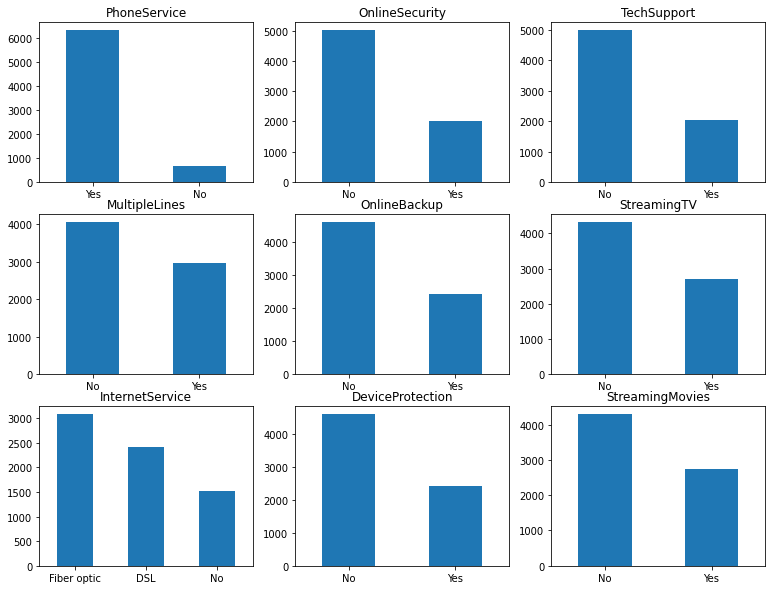

In [38]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (13,10))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

#### MonthlyCharges & TotalCharges

total charges increase as monthly charges increase

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

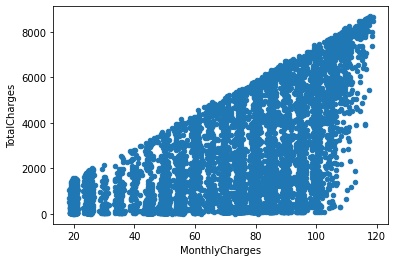

In [39]:
df[['MonthlyCharges','TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                   y = 'TotalCharges')

### 1.3.2 Breaking down predictor variable: churn rate 

#### 1.3.2.1 Target Distribution (Churn vs Retain)

In [40]:
pie_data = df['Churn'].value_counts(normalize = True).sort_values(ascending = True).round(4)*100
pie_data.index = ['churn', 'retain']
pie_data

churn     26.54
retain    73.46
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Target Distribution')

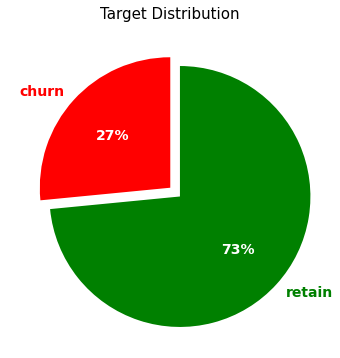

In [41]:
fig, ax = plt.subplots(figsize = (8,6))

wedges, texts, autotexts = ax.pie(pie_data,
                                  labels = pie_data.index,
                                  startangle = 90, 
                                  explode = [0, 0.1],
                                  autopct='%.0f%%', 
                                  textprops={'weight': 'bold', 'color': 'w', 'fontsize': 14},
                                  colors = ['r', 'g'])

#set the color of wedge label text
for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.title('Target Distribution', fontsize = 15)

73% of the customers are loyal; hence, the data is skewed.

#### 1.3.2.2 Categorical variable

##### Churn vs Gender

In [42]:
gender_crosstab = pd.crosstab(df['Gender'], df['Churn'])
gender_crosstab

Churn,0,1
Gender,,
Female,2549,939
Male,2625,930


In [43]:
gender_crosstab = pd.crosstab(df['Gender'], df['Churn'], normalize = 'index').round(4)*100
gender_crosstab

Churn,0,1
Gender,,
Female,73.08,26.92
Male,73.84,26.16


In [44]:
labels = ['retain', 'churn']
legend_title = 'Churn'
y_label = 'Percentage of customer (%)'

#function for visualize stacked bar graph
def stacked_bar(data, graph_title, legend_title, labels, y_label, x_label):
    
    ax = data.plot(kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (10,6), color = ['g', 'r'])

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}%'.format(height), 
                    (p.get_x()+.3*width, p.get_y()+.4*height),
                    color = 'w',
                    weight = 'bold',size =14)

    plt.title(graph_title, fontsize = 14)
    plt.legend(title = legend_title, labels = labels)
    plt.ylabel(y_label, fontsize = 12)
    plt.xlabel(x_label, fontsize = 12)

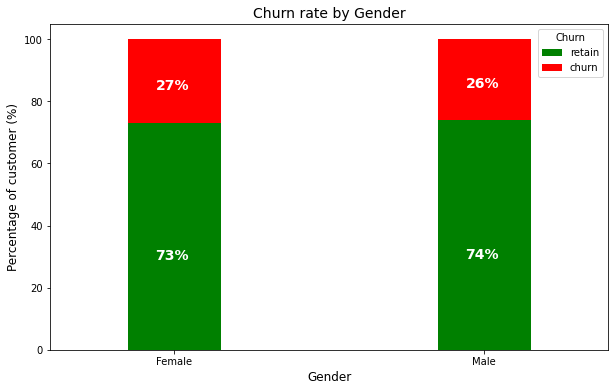

In [45]:
stacked_bar(gender_crosstab, 'Churn rate by Gender', legend_title, labels, y_label, 'Gender')

**Female and male has more or less the same churn rate. Hence, gender has no correlation to churn.**

##### Churn vs Senior Citizen

The distribution of senior citizen is uneven

In [46]:
senior_citizen_crosstab = pd.crosstab(df['SeniorCitizen'], df['Churn'])
senior_citizen_crosstab

Churn,0,1
SeniorCitizen,,
No,4508,1393
Yes,666,476


In [47]:
senior_citizen_crosstab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize = 'index').round(4)*100
senior_citizen_crosstab

Churn,0,1
SeniorCitizen,,
No,76.39,23.61
Yes,58.32,41.68


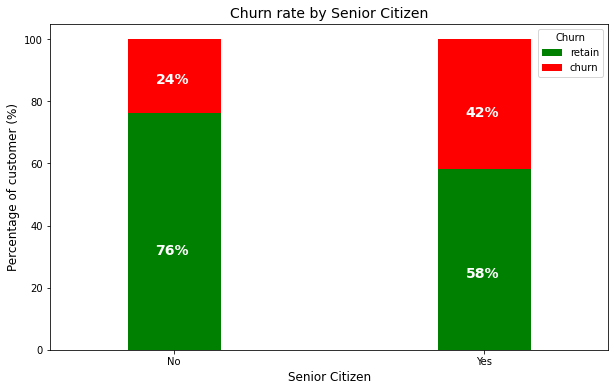

In [48]:
stacked_bar(senior_citizen_crosstab, 'Churn rate by Senior Citizen', legend_title, labels, y_label, 'Senior Citizen')

**Churn rate of senior citizen is double of younger citizen, this attribute has a relationship with churn attribute.**

##### Churn vs Contract Type

In [49]:
contract_crosstab = pd.crosstab(df['Contract'], df['Churn'])
contract_crosstab

Churn,0,1
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [50]:
contract_crosstab = pd.crosstab(df['Contract'], df['Churn'], normalize = 'index').round(4)*100
contract_crosstab

Churn,0,1
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


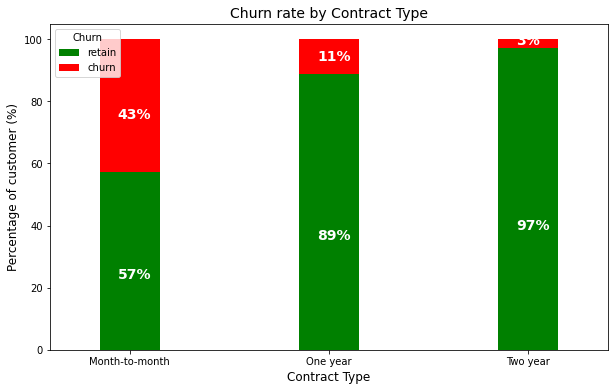

In [51]:
stacked_bar(contract_crosstab, 'Churn rate by Contract Type', legend_title, labels, y_label, 'Contract Type')

**Month-to-month contract type has the highest churn rate**

##### Churn vs PaperlessBilling

In [52]:
billing_crosstab = pd.crosstab(df['PaperlessBilling'], df['Churn'])
billing_crosstab

Churn,0,1
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [53]:
billing_crosstab = pd.crosstab(df['PaperlessBilling'], df['Churn'], normalize = 'index').round(4)*100
billing_crosstab

Churn,0,1
PaperlessBilling,,
No,83.67,16.33
Yes,66.43,33.57


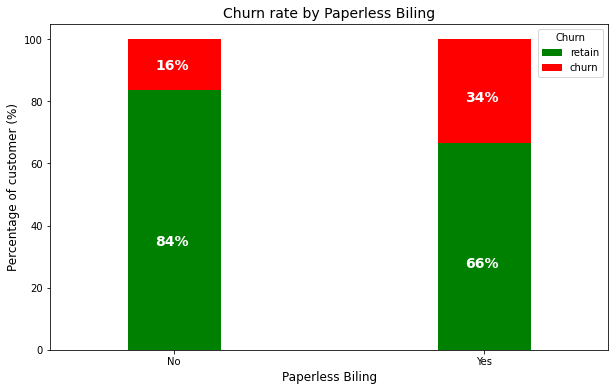

In [54]:
stacked_bar(billing_crosstab, 'Churn rate by Paperless Biling', legend_title, labels, y_label, 'Paperless Biling')

**With paperless billing, the churn rate is double of with receipt.**

##### Churn vs PaymentMethod

In [55]:
payment_crosstab = pd.crosstab(df['PaymentMethod'], df['Churn'])
payment_crosstab

Churn,0,1
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [56]:
payment_crosstab = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize = 'index').round(4)*100
payment_crosstab

Churn,0,1
PaymentMethod,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11


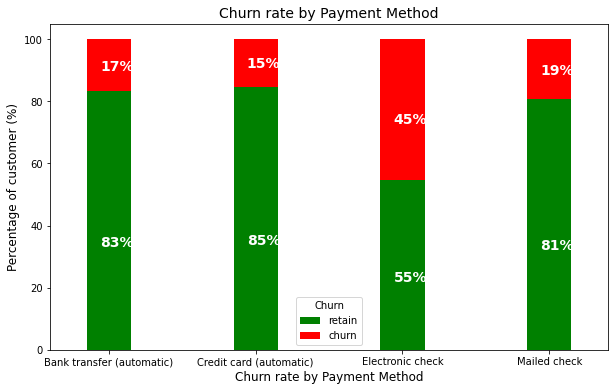

In [57]:
stacked_bar(payment_crosstab, 'Churn rate by Payment Method', legend_title, labels, y_label, 'Churn rate by Payment Method')

**churn rate is similar among automatic bank transfer, automatic deduct from credit card, and mailed check, except electronic check which is at least 2 times higher than the others.**

#### 1.3.2.2 Numerical variable

##### Churn vs Tenure

[Text(0, 0, 'retain'), Text(1, 0, 'churn')]

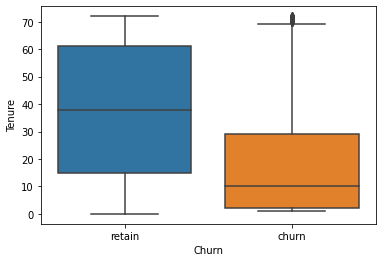

In [58]:
ax = sns.boxplot(x = df['Churn'], y = df['Tenure'])
ax.set_xticklabels(['retain', 'churn'])

**customer with short tenure has very high churn rate. This could because they are still trying the services during this period of time and are considering whether to continue the service or not.**

Before this we have analyzed the churn rate vs contract type and found the month-to-month contract type has the highest churn rate. Lets find out the distribution of tenure by contract type.

(0.0, 18.0)

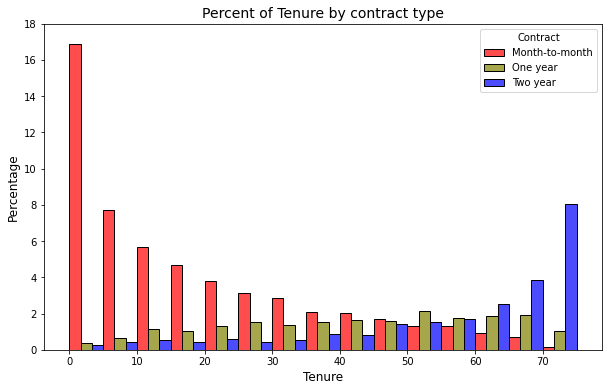

In [59]:
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(x = 'Tenure', 
             hue = 'Contract', 
             data = df, 
             stat = 'percent',
             multiple = 'dodge', 
             alpha = 0.7, 
             binwidth = 5,
             palette = ['red', 'olive', 'blue'])
plt.title('Percent of Tenure by contract type', fontsize = 14)
plt.ylabel('Percentage', fontsize =12)
plt.xlabel('Tenure', fontsize =12)
plt.ylim(0, 18)

In [60]:
print(df['Contract'].value_counts())

print( '25% of month-to-month is', (df['Contract'] == 'Month-to-month').sum()/100*25)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
25% of month-to-month is 968.75


**Note that customers who subscribe to month-to-month contract type is the highest among the contracts.** 

The graph shows that approximately 25% of customers(around 970 customers) who suscribe month-to-month contract has short tenure (0-5 months). We can assume that customer who has short tenure are new customer as they want to try the service. This can be proven if we have the date of customer first register to the company service. Moreover, customers with two years contract tends to be loyal to the company

##### Churn vs Monthly Charge

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

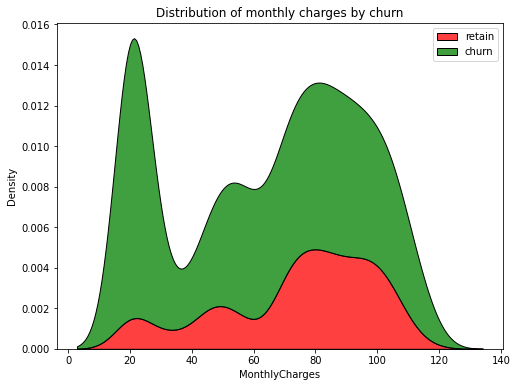

In [61]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.kdeplot(data = df, x = df['MonthlyCharges'], hue = df['Churn'], multiple = 'stack', palette = ['green', 'red'])
ax.legend(['retain', 'churn'])
ax.set_title('Distribution of monthly charges by churn')

**No clear trend** 

rise at 20, then goes down, then rise again, and drop when the charges is 60. It pekas at 80 but drop after 100.

Some customers might think that high charges is worthy hence the churn rate is low.

##### Churn vs Total Charge

Text(0.5, 1.0, 'Distribution of total charges by churn')

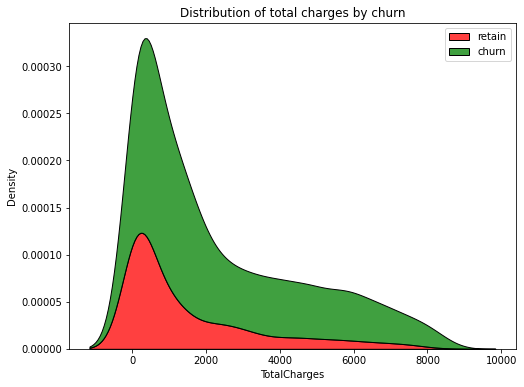

In [62]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.kdeplot(data = df, x = df['TotalCharges'], hue = df['Churn'], multiple = 'stack', palette = ['green', 'red'])
ax.legend(['retain', 'churn'])
ax.set_title('Distribution of total charges by churn')

churn rate is high when the total charges is less than 1000. Suggestion to introduce tier-priviledge for customers fall within this range of total charges.

In [63]:
df2 = df.copy()

df_dummies = pd.get_dummies(df2)
df_dummies.head()

#we can also use label encoding for predictor variable 
#one-hot encoding for the others

,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

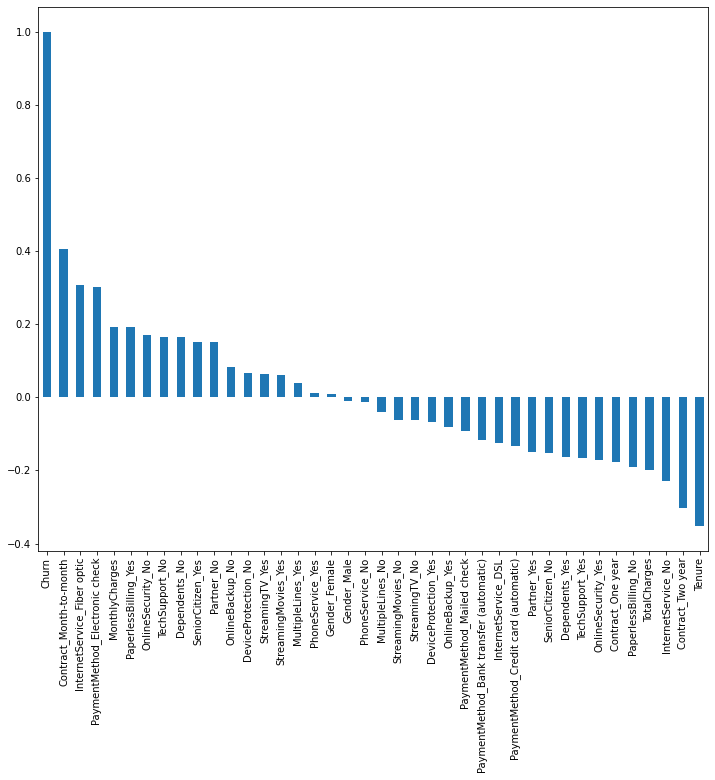

In [64]:
plt.figure(figsize=(12,10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Top five categorical attributes with high correlation with churn rate:
- Contract Month-to-month
- Internet Service (Fiber optic)
- Payment Method (Electronic check)
- Paperless Billing (Yes)
- Online Security (No)

Top five categorical attributes with low correlation with churn rate:
- Contract (Two years)
- Internet Service (No)
- Paperless Biling (No)
- Contract (One years)
- Online Security (Yes)

**This shows their relationship but does not imply causation**

## 2. Part 2: Prediction

## 2.1 Data Preprocessing

In [234]:
#Train-Test Set
from sklearn.model_selection import train_test_split 

#scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN

#model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

#feature selection & hyperparameter tuning
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, RFE, RFECV
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

## 2.1 Train-Test Set

In [69]:
df_dummies

,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,0,1,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1


In [70]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, stratify = y, random_state = 1)

In [74]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X shape: (7043, 39)
y shape: (7043,)
X_train shape: (4930, 39)
y_train shape: (4930,)
X_test shape: (2113, 39)
y_test shape: (2113,)


### 2.1.1 Train set

In [77]:
X_train.head(5)

,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6427,41,20.15,802.35,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
6971,18,99.75,1836.25,1,0,0,1,0,1,1,...,1,1,0,0,1,0,1,0,0,0
96,71,66.85,4748.70,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
5640,1,79.60,79.60,0,1,1,0,1,0,1,...,1,1,0,0,1,0,0,0,1,0
414,48,70.65,3545.05,1,0,0,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0


### 2.1.2 Test set

In [78]:
X_test.head(5)

,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1630,38,102.60,4009.20,0,1,0,1,0,1,1,...,1,1,0,0,0,1,0,0,1,0
2008,4,87.10,341.45,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
2685,72,100.65,7334.05,1,0,1,0,0,1,1,...,0,0,0,1,1,0,1,0,0,0
903,56,105.60,6068.65,1,0,1,0,0,1,1,...,1,0,1,0,0,1,0,1,0,0
3905,3,35.20,108.95,1,0,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


## 2.2 Feature Scaling

scaling the variables to [0,1] for normal distribution

In [80]:
for i in column_numerical:
    
    scaler = MinMaxScaler()
    
    #fit & transform X_train
    scaler.fit(X_train[[i]]) 
    X_train[[i]] = scaler.transform(X_train[[i]])

    #transform X_test
    X_test[[i]] = scaler.transform (X_test[[i]])

In [82]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
X_train.head(5)

,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6427,0.569,0.017,0.092,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
6971,0.250,0.811,0.211,1,0,0,1,0,1,1,...,1,1,0,0,1,0,1,0,0,0
96,0.986,0.483,0.547,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
5640,0.014,0.610,0.009,0,1,1,0,1,0,1,...,1,1,0,0,1,0,0,0,1,0
414,0.667,0.521,0.408,1,0,0,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0


## 2.3 Oversampling with SMOTE

We need to balance the data as the data is imbalanced (retain vs churn = 74% vs 26%), and we are using oversampling with SMOTE

In [93]:
smote = SMOTE(random_state = 1)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [125]:
print('Before SMOTE')
count_of_ones = np.count_nonzero(y_train == 1)
print("Count of ones:", count_of_ones)

count_of_ones = np.count_nonzero(y_train == 0)
print("Count of zeros:", count_of_ones)

Count of ones: 1308
Count of zeros: 3622


In [127]:
print('After SMOTE')
count_of_ones = np.count_nonzero(y_train_smote == 1)
print("Count of ones:", count_of_ones)

count_of_ones = np.count_nonzero(y_train_smote == 0)
print("Count of zeros:", count_of_ones)

After SMOTE
Count of ones: 3622
Count of zeros: 3622


Now both retain and churn has the same number of data.

## 2.4 Model Evaluation

### 2.4.1 Define scoring function

In [128]:
def get_score(y_pred_list, y_test, average=None, plot=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      #compare true positive predictions vs total positive prediction  
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        f'{average}_avg_precision':precision,
        f'{average}_avg_recall':recall,
        f'{average}_avg_f1_score':f1,
        'roc_auc':roc_auc
      }
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'roc_auc':roc_auc
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if plot:
    #axis: which the color gradient is applied to 
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df

## 2.5 Model Development

### 2.5.1 Baseline model

In [235]:
model_list = {
    'LR': LogisticRegression(max_iter = 1000),
    'RC': RidgeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GB': GradientBoostingClassifier(),
    'XGB': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose = 0),
    'NN': MLPClassifier(max_iter = 1000)
}

X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test.copy()
y_test_model = y_test.copy()

In [236]:
y_pred_list = dict()

for name, model in model_list.items():
    model.fit(X_train_model, y_train_model)
    y_pred_list[name] = model.predict(X_test_model) #{'model': 'prediction value'}

#compute the metric by taking unweighted mean of these scores
score = get_score(y_pred_list, y_test_model, average = 'macro')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
LR,0.793185,0.735764,0.744825,0.739954,0.744825
RC,0.792239,0.735385,0.749302,0.741518,0.749302
KNN,0.702792,0.651661,0.681015,0.656871,0.681015
SVM,0.795078,0.737443,0.739853,0.738625,0.739853
DT,0.721249,0.653790,0.667970,0.659134,0.667970
RF,0.777567,0.716646,0.725657,0.720767,0.725657
AdaBoost,0.756271,0.710773,0.753273,0.720055,0.753273
GB,0.780407,0.726207,0.754907,0.736443,0.754907
XGB,0.782300,0.720490,0.716927,0.718654,0.716927


Logistic Regression, Ridge Classifier, SVM, and Boosting methods shows overall good performance across all evaluation methods.

We will eliminate K-Nearest Neighbor classifier, Decision Tree, Random Forest, and Neural Network from the model list due to poor accuracy and/or recall.

In [239]:
model_list = {
    'LR': LogisticRegression(max_iter = 1000),
    'RC': RidgeClassifier(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'GB': GradientBoostingClassifier(),
    'XGB': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose = 0),
}

In [240]:
y_pred_list = dict()

for name, model in model_list.items():
    model.fit(X_train_model, y_train_model)
    y_pred_list[name] = model.predict(X_test_model) 

score = get_score(y_pred_list, y_test_model, average = 'macro')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
LR,0.793185,0.735764,0.744825,0.739954,0.744825
RC,0.792239,0.735385,0.749302,0.741518,0.749302
SVM,0.795078,0.737443,0.739853,0.738625,0.739853
AdaBoost,0.756271,0.710773,0.753273,0.720055,0.753273
GB,0.780407,0.726207,0.754907,0.736443,0.754907
XGB,0.782300,0.720490,0.716927,0.718654,0.716927
LGBM,0.784193,0.724709,0.733582,0.728793,0.733582


## 2.6 Feature Selection 

### 2.6.1 ANOVA

In [241]:
threshold = 10 #min features to select

#create SelectKBest instance with ANOVA scoring function
filter = SelectKBest(score_func=f_classif, k=threshold)
filter.fit(X_train_model, y_train_model)

#fit SelectKBest instance to the data
X_train_filter = filter.transform(X_train_model)
X_test_filter = filter.transform(X_test_model)

<AxesSubplot:xlabel='feature_score', ylabel='feature_name'>

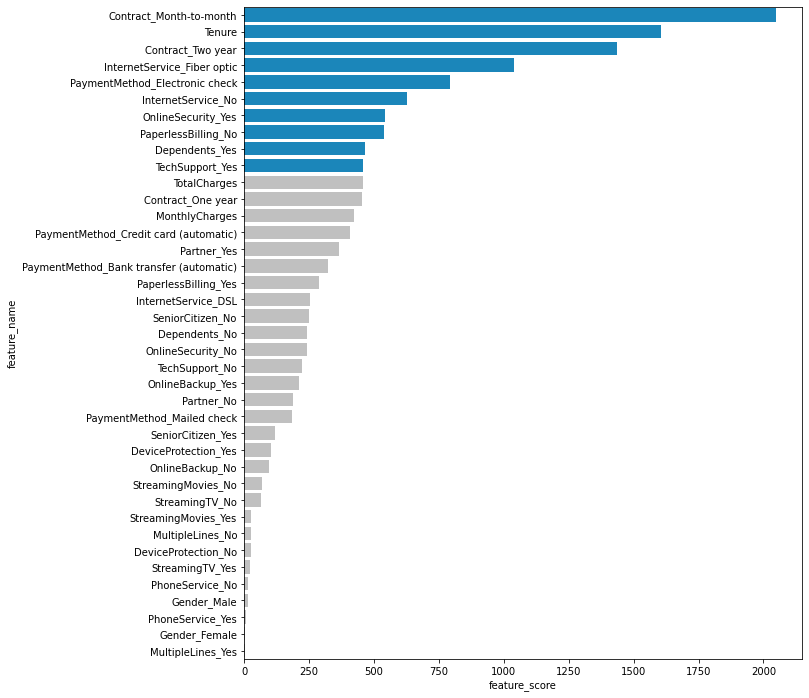

In [242]:
# visualization
selected_feature = filter.get_feature_names_out()
feature_name = filter.feature_names_in_
feature_score = filter.scores_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_score':feature_score}).sort_values('feature_score', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize=(10,12))
sns.barplot(data=feature_selection, x='feature_score', y='feature_name', ax=ax, palette=palette)

In [243]:
y_pred_list = dict()

for name, model in model_list.items():
    model.fit(X_train_filter, y_train_model)
    y_pred_list[name] = model.predict(X_test_filter) 

score_filter = get_score(y_pred_list, y_test_model, average = 'macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
LR,0.753431,0.712661,0.759876,0.720633,0.759876
RC,0.745386,0.707931,0.756676,0.714098,0.756676
SVM,0.744912,0.704015,0.749525,0.711193,0.749525
AdaBoost,0.751065,0.713829,0.763956,0.720475,0.763956
GB,0.748699,0.706555,0.751533,0.714426,0.751533
XGB,0.749172,0.698160,0.733075,0.707323,0.733075
LGBM,0.765263,0.710349,0.739475,0.720070,0.739475


### 2.6.2 RFE

In [244]:
threshold = 10
estimator = LogisticRegression(max_iter = 1000, random_state = 1)

wrapper = RFE(estimator = estimator, n_features_to_select = threshold)
wrapper.fit(X_train_model, y_train_model)

X_train_wrap = wrapper.transform(X_train_model)
X_test_wrap = wrapper.transform(X_test_model)

<AxesSubplot:xlabel='feature_ranking', ylabel='feature_name'>

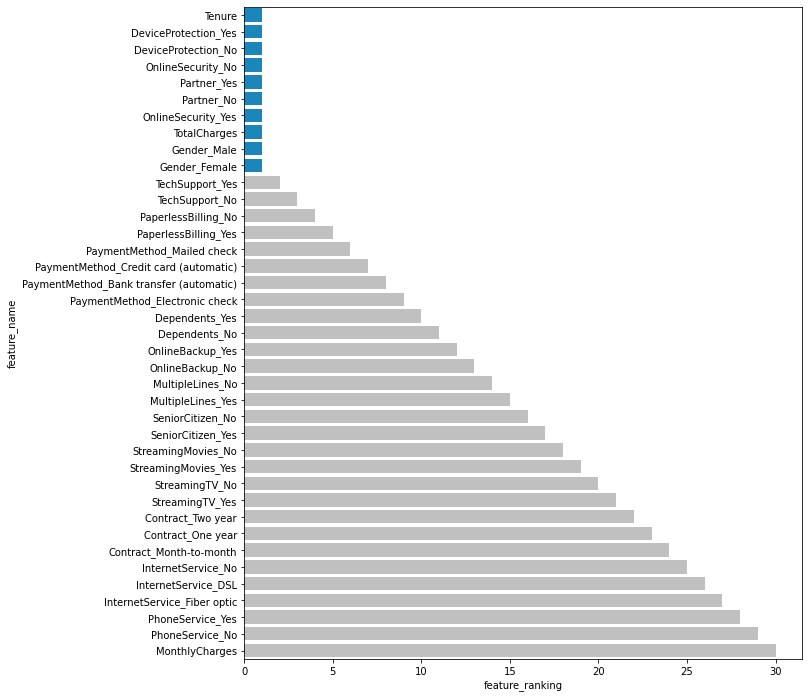

In [245]:
# viz
selected_feature = wrapper.get_feature_names_out()
feature_name = wrapper.feature_names_in_
feature_ranking = wrapper.ranking_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_ranking':feature_ranking}).sort_values('feature_ranking', ascending=True)
feature_selection.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize=(10,12))

sns.barplot(data=feature_selection, x='feature_ranking', y='feature_name', ax=ax, palette=palette)

In [246]:
y_pred_list = dict()

for name, model in model_list.items():
    model.fit(X_train_wrap, y_train_model)
    y_pred_list[name] = model.predict(X_test_wrap)
    
score_wrapper = get_score(y_pred_list, y_test_model, average = 'macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
LR,0.717937,0.673704,0.711243,0.679110,0.711243
RC,0.704212,0.666013,0.705314,0.668446,0.705314
SVM,0.694274,0.659727,0.699118,0.659985,0.699118
AdaBoost,0.721723,0.684978,0.729186,0.688614,0.729186
GB,0.743019,0.690307,0.722626,0.699006,0.722626
XGB,0.746805,0.686329,0.707562,0.693966,0.707562
LGBM,0.755797,0.695201,0.714821,0.702696,0.714821


### 2.6.3 RFECV

RFECV with Logistic Regression as its base estimator

In [247]:
threshold = 10
estimator = LogisticRegression(max_iter =1000, random_state = 1)

wrappercv = RFECV(estimator = estimator, min_features_to_select = threshold)
wrappercv.fit(X_train_model, y_train_model)

X_train_wrap_cv = wrappercv.transform(X_train_model)
X_test_wrap_cv = wrappercv.transform(X_test_model)

<AxesSubplot:xlabel='feature_ranking', ylabel='feature_name'>

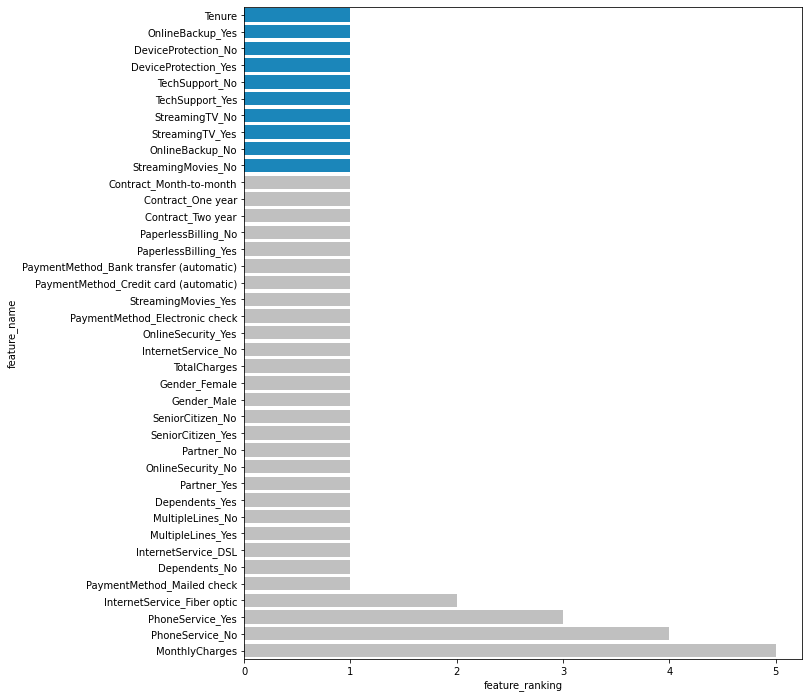

In [248]:
# viz
selected_feature = wrappercv.get_feature_names_out()
feature_name = wrappercv.feature_names_in_
feature_ranking = wrappercv.ranking_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_ranking':feature_ranking}).sort_values('feature_ranking', ascending=True)
feature_selection.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize=(10,12))

sns.barplot(data=feature_selection, x='feature_ranking', y='feature_name', ax=ax, palette=palette)

In [249]:
y_pred_list = dict()

for name, model in model_list.items():
    model.fit(X_train_wrap_cv, y_train_model)
    y_pred_list[name] = model.predict(X_test_wrap_cv)
    
score_wrapper_cv = get_score(y_pred_list, y_test_model, average = 'macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
LR,0.794605,0.737423,0.745791,0.741320,0.745791
RC,0.790819,0.733712,0.747767,0.739887,0.747767
SVM,0.793185,0.734919,0.735719,0.735317,0.735719
AdaBoost,0.754851,0.708607,0.750030,0.717870,0.750030
GB,0.786559,0.733600,0.764217,0.744418,0.764217
XGB,0.768575,0.703921,0.706446,0.705152,0.706446
LGBM,0.779460,0.719406,0.730360,0.724320,0.730360


### 2.6.4 Comparison

In [250]:
score_mean = pd.DataFrame(score.mean(), columns = ['Before']).T
score_filter = pd.DataFrame(score_filter.mean(), columns = ['ANOVA']).T
score_wrapper = pd.DataFrame(score_wrapper.mean(), columns = ['wrapper RFE']).T
score_wrapper_cv = pd.DataFrame(score_wrapper_cv.mean(), columns = ['wrapper RFECV']).T

score_comparison = pd.concat([score_mean, score_filter, score_wrapper, score_wrapper_cv], axis = 0)

score_comparison.style.background_gradient(axis = 0)

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
Before,0.783382,0.727253,0.741810,0.732006,0.741810
ANOVA,0.751132,0.707643,0.750588,0.715460,0.750588
wrapper RFE,0.726252,0.679466,0.712838,0.684546,0.712838
wrapper RFECV,0.781151,0.724513,0.740047,0.729755,0.740047


Overall, I think ANOVA chooses the feature that aligns with our findings during EDA despite the overall evaluation performance is lower than the other two. 
It doesn't make sense to me why RFE and RFECV choose those features. Will look into that when have I some spared time. <br>

For now I will just use the original features and the features selected from ANOVA filter method.

## 2.7 Hyperparameter Tuning

tuning objectives:
    
- increase recall as much as possible (so the company will not miss out those churned customer, they can identify them correctly and offered counter solutions) *always remember retaining customer is cheaper than acquiring new customers*
- increase precision or accuracy as much as possible

In [329]:
#calculate hyperparameter tuning results

def evaluate(model, X_train_model, y_train_model):
     
    results = dict()
    values = []
    key = ['accuracy', 'precision', 'recall', 'f1', 'auc']

    predictions = model.predict(X_train_model)

    accuracy = accuracy_score(y_train_model, predictions).round(4)*100
    precision = precision_score(y_train_model, predictions).round(3)*100
    recall = recall_score(y_train_model, predictions).round(4)*100
    f1 = f1_score(y_train_model, predictions).round(3)*100
    auc = roc_auc_score(y_train_model, predictions).round(4)*100
    
    values.append(accuracy)
    values.append(precision)
    values.append(recall)
    values.append(f1)
    values.append(auc)
    
    results = dict(zip(key, values))

    return results

In [251]:
model_list = {
    'LR': LogisticRegression(max_iter = 1000),
    'RC': RidgeClassifier(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'GB': GradientBoostingClassifier(),
    'XGB': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose = 0),
}

### 2.7.1 LR

In [260]:
lr = LogisticRegression()

distribution = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'],
                'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                'C': [0.001,0.01, 0.1, 1,10,100,1000]
               }

lr_tuned = RandomizedSearchCV(estimator = lr,
                               param_distributions = distribution
                              )

lr_tuned.fit(X_train_model, y_train_model)
print("Tuning done")

C:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Tuning done


In [291]:
best_params = lr_random.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}


In [293]:
# Train LR with the best hyperparameters
best_lr = LogisticRegression(**best_params)

best_lr.fit(X_train_model, y_train_model)

y_pred = best_lr.predict(X_test_model)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1552
           1       0.62      0.64      0.63       561

    accuracy                           0.80      2113
   macro avg       0.74      0.75      0.74      2113
weighted avg       0.80      0.80      0.80      2113



In [330]:
results = evaluate(best_lr, X_train_model, y_train_model)
results = pd.Series(results)
results = pd.DataFrame(results).T.rename({0: 'metrics'})
results

,accuracy,precision,recall,f1,auc
metrics,85.050,86.000,83.710,84.800,85.050


### 2.7.2 RC

In [258]:
rc = RidgeClassifier()
print("Parameter currently in used: \n")
pprint(rc.get_params())

Parameter currently in used: 

{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}


In [263]:
distribution = {'alpha': [0.1, 0.3, 0.5, 0.7, 1.0],
                'solver': ['auto', 'sag', 'sparse_cg']
               }

rc_tuned = RandomizedSearchCV(estimator = rc,
                              param_distributions = distribution
                             )

rc_tuned.fit(X_train_model, y_train_model)
print("Tuning done")

Tuning done


In [332]:
best_params = rc_tuned.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'solver': 'sparse_cg', 'alpha': 1.0}


In [333]:
best_rc = RidgeClassifier(**best_params)

best_rc.fit(X_train_model, y_train_model)

y_pred = best_rc.predict(X_test_model)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1552
           1       0.60      0.66      0.63       561

    accuracy                           0.79      2113
   macro avg       0.74      0.75      0.74      2113
weighted avg       0.80      0.79      0.80      2113



In [334]:
results = evaluate(best_rc, X_train_model, y_train_model)
results = pd.Series(results)
results = pd.DataFrame(results).T.rename({0: 'metrics'})
results

,accuracy,precision,recall,f1,auc
metrics,84.390,84.400,84.430,84.400,84.390


### 2.7.3 SVM

In [266]:
svm = SVC()
print("Parameter currently in used: \n")
pprint(svm.get_params())

Parameter currently in used: 

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [336]:
distribution = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [0.01, 0.1, 1, 10],
                'gamma': [0.01, 0.1, 1, 10],
               }

svm_tuned = RandomizedSearchCV(estimator = svm,
                               param_distributions = distribution
                              )

svm_tuned.fit(X_train_model, y_train_model)
print("Tuning done")

Tuning done


In [354]:
best_params = svm_tuned.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'kernel': 'rbf', 'C': 1}


In [355]:
best_svm = SVC(**best_params)

best_svm.fit(X_train_model, y_train_model)

y_pred = best_svm.predict(X_test_model)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1552
           1       0.61      0.62      0.62       561

    accuracy                           0.80      2113
   macro avg       0.74      0.74      0.74      2113
weighted avg       0.80      0.80      0.80      2113



In [356]:
results = evaluate(best_svm, X_train_model, y_train_model)
results = pd.Series(results)
results = pd.DataFrame(results).T.rename({0: 'metrics'})
results

,accuracy,precision,recall,f1,auc
metrics,86.620,87.600,85.280,86.400,86.620


### 2.7.4 Ada Boost

In [270]:
adab = AdaBoostClassifier()
print("Parameter currently in used: \n")
pprint(adab.get_params())

Parameter currently in used: 

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}


In [360]:
distribution = {'n_estimators': [10, 50, 70, 100],
                'learning_rate': [0.01, 0.05, 0.1, 0.2, 1]
               }

adab_tuned = RandomizedSearchCV(estimator = adab,
                               param_distributions = distribution
                              )

adab_tuned.fit(X_train_model, y_train_model)
print("Tuning done")

Tuning done


In [361]:
best_params = adab_tuned.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 50, 'learning_rate': 1}


In [362]:
best_adab = AdaBoostClassifier(**best_params)

best_adab.fit(X_train_model, y_train_model)

y_pred = best_adab.predict(X_test_model)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1552
           1       0.53      0.75      0.62       561

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.80      0.76      0.77      2113



In [363]:
results = evaluate(best_adab, X_train_model, y_train_model)
results = pd.Series(results)
results = pd.DataFrame(results).T.rename({0: 'metrics'})
results

,accuracy,precision,recall,f1,auc
metrics,81.780,79.200,86.110,82.500,81.780


### 2.7.5 GB

In [276]:
gb = GradientBoostingClassifier()
print("Parameter currently in used: \n")
pprint(gb.get_params())

Parameter currently in used: 

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [367]:
#initial plan: lower the learning rate & increase the estimators

distribution = {'n_estimators': [100, 200, 300, 400, 500, 1000],
                'learning_rate': [0.01, 0.05, 0.1, 0.2],
                'max_depth': [1, 2, 3],
                'min_samples_leaf': [1, 2, 3]
               }

gb_tuned = RandomizedSearchCV(estimator = gb,
                               param_distributions = distribution
                              )

gb_tuned.fit(X_train_model, y_train_model)
print("Tuning done")

Tuning done


In [368]:
best_params = gb_tuned.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 400, 'min_samples_leaf': 3, 'max_depth': 2, 'learning_rate': 0.2}


In [369]:
best_gb = GradientBoostingClassifier(**best_params)

best_gb.fit(X_train_model, y_train_model)

y_pred = best_gb.predict(X_test_model)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1552
           1       0.59      0.63      0.61       561

    accuracy                           0.79      2113
   macro avg       0.73      0.74      0.73      2113
weighted avg       0.79      0.79      0.79      2113



In [370]:
results = evaluate(best_gb, X_train_model, y_train_model)
results = pd.Series(results)
results = pd.DataFrame(results).T.rename({0: 'metrics'})
results

,accuracy,precision,recall,f1,auc
metrics,87.690,87.200,88.380,87.800,87.690


### 2.7.6 XGB

In [371]:
xgb = XGBClassifier()
print("Parameter currently in used: \n")
pprint(xgb.get_params())

Parameter currently in used: 

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


In [372]:
distribution = {'n_estimators': [100, 200, 300, 400, 500, 1000],
                'learning_rate': [0.01, 0.05, 0.1, 0.2],
                'max_depth': [1, 2, 3]
               }

xgb_tuned = RandomizedSearchCV(estimator = xgb,
                               param_distributions = distribution
                              )

xgb_tuned.fit(X_train_model, y_train_model)
print("Tuning done")

Tuning done


In [373]:
best_params = xgb_tuned.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2}


In [374]:
best_xgb = XGBClassifier(**best_params)

best_xgb.fit(X_train_model, y_train_model)

y_pred = best_xgb.predict(X_test_model)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1552
           1       0.59      0.60      0.60       561

    accuracy                           0.78      2113
   macro avg       0.72      0.73      0.72      2113
weighted avg       0.79      0.78      0.78      2113



In [375]:
results = evaluate(best_xgb, X_train_model, y_train_model)
results = pd.Series(results)
results = pd.DataFrame(results).T.rename({0: 'metrics'})
results

,accuracy,precision,recall,f1,auc
metrics,89.360,88.900,89.920,89.400,89.360


### 2.7.7 LGBM

In [376]:
lgbm = LGBMClassifier()
print("Parameter currently in used: \n")
pprint(lgbm.get_params())

Parameter currently in used: 

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


In [377]:
distribution = {'n_estimators': [100, 200, 300, 400, 500, 1000],
                'learning_rate': [0.01, 0.05, 0.1, 0.2],
                'max_depth': [1, 2, 3]
               }

lgbm_tuned = RandomizedSearchCV(estimator = lgbm,
                               param_distributions = distribution
                              )

lgbm_tuned.fit(X_train_model, y_train_model)
print("Tuning done")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2898, number of negative: 2897
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 5795, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000345
[LightGBM] [Info] Start training from score 0.000345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, r

[LightGBM] [Info] Number of positive: 2898, number of negative: 2897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 5795, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000345
[LightGBM] [Info] Start training from score 0.000345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2898, number of negative: 2898
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 5796, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2898, number of negative: 2897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [I

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2898, number of negative: 2897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001007 second

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2898, number of negative: 2897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 5795, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000345
[LightGBM] [Info] Start training from score 0.000345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2897, number of negative: 2898
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 5795, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499914 -> initscore=-0.000345
[LightGBM] [Info] Start training from score -0.000345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [379]:
best_params = lgbm_tuned.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.1}


In [380]:
best_lgbm = LGBMClassifier(**best_params)

best_lgbm.fit(X_train_model, y_train_model)

y_pred = best_lgbm.predict(X_test_model)

print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [381]:
results = evaluate(best_lgbm, X_train_model, y_train_model)
results = pd.Series(results)
results = pd.DataFrame(results).T.rename({0: 'metrics'})
results

,accuracy,precision,recall,f1,auc
metrics,88.350,87.600,89.320,88.500,88.350


## 2.8 Model Selection

In [390]:
model_list = {
    'LR': LogisticRegression(max_iter = 1000),
    'RC': RidgeClassifier(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'GB': GradientBoostingClassifier(),
    'XGB': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose = 0),
}

In [386]:
model_list_tuned = {
    'LR': LogisticRegression(max_iter = 1000, solver = 'newton-cg', penalty = 'l2', C = 10
),
    'RC': RidgeClassifier(solver = 'sparse_cg', alpha = 1.0),
    'SVM': SVC(kernel = 'rbf', C = 1),
    'AdaBoost': AdaBoostClassifier(n_estimators = 50, learning_rate = 1
),
    'GB': GradientBoostingClassifier(n_estimators = 400, min_samples_leaf = 3, max_depth = 2, learning_rate = 0.2
),
    'XGB': XGBClassifier(n_estimators = 300, max_depth = 3, learning_rate = 0.2),
    'LGBM': LGBMClassifier(n_estimators = 400, max_depth = 3, learning_rate = 0.1)
}

### 2.8.1 without feature selection

#### 2.8.1.1 before tuning

In [394]:
y_pred_list = dict()

for name, model in model_list_tuned.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_baseline = get_score(y_pred_list, y_test_model)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
LR,0.798391,0.616580,0.636364,0.626316,0.746661
RC,0.792712,0.600000,0.657754,0.627551,0.749624
SVM,0.795078,0.612281,0.622103,0.617153,0.739853
AdaBoost,0.756271,0.529040,0.746881,0.619364,0.753273
GB,0.785613,0.590000,0.631016,0.609819,0.736255
XGB,0.783247,0.589565,0.604278,0.596831,0.726108
LGBM,0.786559,0.592593,0.627451,0.609524,0.735762


#### 2.8.1.2 after tuning

In [393]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_tuned = get_score(y_pred_list, y_test_model)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
LR,0.793185,0.604027,0.641711,0.622299,0.744825
RC,0.792239,0.599026,0.657754,0.627018,0.749302
SVM,0.795078,0.612281,0.622103,0.617153,0.739853
AdaBoost,0.756271,0.529040,0.746881,0.619364,0.753273
GB,0.780407,0.570392,0.700535,0.628800,0.754907
XGB,0.782300,0.592322,0.577540,0.584838,0.716927
LGBM,0.784193,0.587940,0.625668,0.606218,0.733582


#### 2.8.1.3 Comparison

accuracy: drop after tuned

In [399]:
score_comparison_accuracy = score_baseline.loc[:, ['accuracy']]
score_comparison_accuracy = score_comparison_accuracy.join(score_tuned.loc[:, ['accuracy']],
                                                          lsuffix = '_before_tuned',
                                                          rsuffix = '_after_tuned')

score_comparison_accuracy.style.background_gradient(axis = 1)

,accuracy_before_tuned,accuracy_after_tuned
model,,
LR,0.798391,0.793185
RC,0.792712,0.792239
SVM,0.795078,0.795078
AdaBoost,0.756271,0.756271
GB,0.785613,0.780407
XGB,0.783247,0.782300
LGBM,0.786559,0.784193


recall: mostly the same

In [398]:
score_comparison_accuracy = score_baseline.loc[:, ['recall']]
score_comparison_accuracy = score_comparison_accuracy.join(score_tuned.loc[:, ['recall']],
                                                          lsuffix = '_before_tuned',
                                                          rsuffix = '_after_tuuned')

score_comparison_accuracy.style.background_gradient(axis = 1)

,recall_before_tuned,recall_after_tuuned
model,,
LR,0.636364,0.641711
RC,0.657754,0.657754
SVM,0.622103,0.622103
AdaBoost,0.746881,0.746881
GB,0.631016,0.700535
XGB,0.604278,0.577540
LGBM,0.627451,0.625668


**remains the same for Ridge Classifier, SVM, and Ada Boosting. Increment shows in Logistic Regression and Gradient Boosting.**

### 2.8.2 without feature selection

#### 2.8.2.1 before tuning

In [403]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_fs_baseline = get_score(y_pred_list, y_test_model)

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
LR,0.753431,0.524155,0.773619,0.624910,0.759876
RC,0.745386,0.513482,0.780749,0.619519,0.756676
SVM,0.744912,0.513253,0.759358,0.612509,0.749525
AdaBoost,0.751065,0.520516,0.791444,0.628006,0.763956
GB,0.748699,0.518293,0.757576,0.615496,0.751533
XGB,0.749172,0.520584,0.698752,0.596651,0.733075
LGBM,0.765263,0.546230,0.684492,0.607595,0.739475


#### 2.8.2.2 after tuning

In [401]:
y_pred_list = dict()

for name, model in model_list_tuned.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_fs_tuned = get_score(y_pred_list, y_test_model)

[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 273
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
LR,0.753431,0.524155,0.773619,0.624910,0.759876
RC,0.745386,0.513482,0.780749,0.619519,0.756676
SVM,0.744912,0.513253,0.759358,0.612509,0.749525
AdaBoost,0.751065,0.520516,0.791444,0.628006,0.763956
GB,0.779934,0.573394,0.668449,0.617284,0.744341
XGB,0.759110,0.534483,0.718360,0.612928,0.746100
LGBM,0.768575,0.550704,0.696970,0.615264,0.745714


accuracy: slightly increase in boosting method, others remain

In [404]:
score_comparison_accuracy = score_fs_baseline.loc[:, ['accuracy']]

score_comparison_accuracy = score_comparison_accuracy.join(score_fs_tuned.loc[:, ['accuracy']],
                                                           lsuffix='_before_tuned', 
                                                           rsuffix='_after_tuned')

score_comparison_accuracy.style.background_gradient(axis=1)

,accuracy_before_tuned,accuracy_after_tuned
model,,
LR,0.753431,0.753431
RC,0.745386,0.745386
SVM,0.744912,0.744912
AdaBoost,0.751065,0.751065
GB,0.748699,0.779934
XGB,0.749172,0.759110
LGBM,0.765263,0.768575


recall: decrease in GB, increase in XGB and LGBM, others remain

In [405]:
score_comparison_accuracy = score_fs_baseline.loc[:, ['recall']]

score_comparison_accuracy = score_comparison_accuracy.join(score_fs_tuned.loc[:, ['recall']],
                                                           lsuffix='_before_tuned', 
                                                           rsuffix='_after_tuned')

score_comparison_accuracy.style.background_gradient(axis=1)

,recall_before_tuned,recall_after_tuned
model,,
LR,0.773619,0.773619
RC,0.780749,0.780749
SVM,0.759358,0.759358
AdaBoost,0.791444,0.791444
GB,0.757576,0.668449
XGB,0.698752,0.718360
LGBM,0.684492,0.696970


**since recall has the first priority, the best model is AdaBoostClassfier with recall of 79% and accuracy of 75%.**

## Conclusion

Best model: AdaBoost with feature selection using ANOVA filter method
    
Suggestion:
The company should think of how to tackle this segment of customer:
- Contract: month-to-month
- Tenure: short tenure
- Internet service: Fiber optic
- Payment method: Electronic check

Action:
- Get feedback (level of satisfaction) from customer with short tenure and with contract of month-to-month
- Conduct survey on fiber optic service (service, price, satisfaction)
- Get feedback from customer who use electronic check, suggest alternative payment method for them

From the feedback, the company can adjust their business solution to provide benefits for new customer (when old customer is satisfied, there is a chance that they will recommend the service to the others.)

## References

Aarshay Jain on GBM Hyperparameter Tuning: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
 
ultimate guide: https://www.kaggle.com/code/adhang/telco-customer-churn-prediction-complete-guide/notebook

add-on: https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction/notebook

tuning: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

SMOTE explain:https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/